# 확률 변수/분포간의 관련성 이해하기 
1. 특정 확률변수/분포들 사이에 존재하는 유사성을 확인하는 코드를 작성한다.
1. Binomial과 Poisson의 유사성
1. Gamma 분포의 특수형인 Exponential
1. Gaussian과 Student's T 
---
## A0. 여러 그래프를 함께 그리기
두 확률변수/분포 사이의 유사성/관련성은 PMF/PDF 그래프의 비교를 통해 확인하려한다. 이를 위해서는 여러 개의 그래프를 함께 표현하는 것이 필요하다. 그래프를 그릴 때 사용하고 있는 Matplotlib Library의 Tutorial을 참고하기 바란다. 
[Refer to Matplotlib Tutorial](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

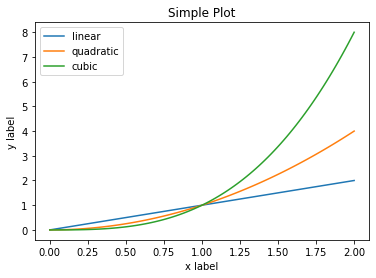

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

# T1. Binomial and Poisson

포아송확률변수는 큰 $n$ 값을 가지고 $n\cdot p = \lambda$를 만족하는 이항확률변수의 극한 경우(Limiting case)라고 할 수 있다. 

<font color='gray'>A Poisson random variable is considered as **a limiting case of the Binomial** random variable for large $n$ with $\lambda = n\cdot p$.  </font>

아래 코드에서 *rv_X1*은 입력 받은 $\lambda$ (변수명 Rate) 값을 인자로 하는 Poisson 확률변수를 위한 scipy.stats의 변수이다. 이에 근사하는 Binomial 확률변수 *rv_X2*를 생성하고 이 둘의 PMF를 함께 그리려 한다. 

*   $X_1 \sim Poisson(\lambda) $
*   $X_2 \sim B(n,p)$

1. Binoimal 확률변수 *rv_X2*를 생성하는 코드를 완성하라. $n$은 사용자로부터 입력을 받는다.
2. 주어진 코드의 기본 $n$ 값은 10이다. 이 값을 변화시켜 두 PMF 그래프 값을 유사하게(눈으로 보기에 일치하게) 만들어 보라. 
---
* Poisson과 Binomial의 관계를 묻는 문제
* 큰 $n$ 값을 가지며 $n\cdot p = \lambda$ 라는 특성을 가지는 Binomial은 인자가 $\lambda$인 Poisson으로 근사할 수 있음
* 먼저 $n\cdot p = \lambda$를 만족하도록 $p$ 값을 조정하여야 한다
* $n$ 값이 현재는 10에 불과한데 $p$를 조정하더라도 두 분포는 차이가 난다. 
* $n$ 값을 변경하며 분포가 얼마나 달라지는지 확인하라. $n$을 크게, 예를 들면 1000 정도로 변경해보라.

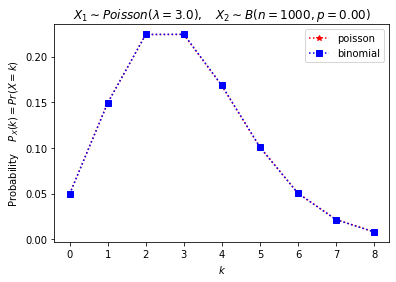

In [ ]:
import scipy.stats as stats

Rate = 3.0#@param {type:"number"}
n = 1000#@param {type:"integer"}

#======== 수정 전/후 ===============
#p = 1/n
p = Rate/n
#====================================

Ks = np.arange(int(Rate*3))

rv_X1 = stats.poisson(Rate)
#======== 수정 전/후 ===============
#rv_X2 = stats.poisson(p)
rv_X2 = stats.binom(n, p)
#====================================

plt.plot(Ks, rv_X1.pmf(Ks),'r:*', label='poisson')
plt.plot(Ks, rv_X2.pmf(Ks),'b:s', label='binomial')
plt.ylabel('Probability    $P_X(k) = Pr(X=k)$')
plt.xlabel('$k$')
plt.title('$X_1 \sim Poisson(\lambda={}), \quad X_2\sim B(n={},p={:.2f})$'.format(Rate, n, p))
plt.legend()
plt.show()

# T2. Exponential and Gamma

지수(Exponential)분포, Erlang 분포, Chi-Square 분포는 Gamma 분포의 특수한 경우이다.

<font color='gray'>The exponential distribution, Erlang distribution and chi-square distribution are special cases of the gamma distribution
</font>

아래 코드에서 *rv_X1*은 입력 받은 $\lambda$ (변수명 Rate) 값을 인자로 하는 Exponenial 확률변수를 위한 scipy.stats의 변수이다.  Exponential 확률 변수는 Gamma 분포의 특수한 경우이므로 주어진 Exponenial 확률변수와 동일한 변수를 Gamma 확률변수 *rv_X2*를 생성하고 이 둘의 PMF를 함께 그리려 한다. 

*   $X_1 \sim Exp(\lambda) $
*   $X_2 \sim Gamma(k,\theta) $

아래 코드에서 *exp_rv*는 입력 받은 $\lambda$ (변수명 Rate) 값을 인자로 하는 Exponential 확률변수를 위한 scipy.stats의 변수이다.

---
* [Gamma Distribution](https://en.wikipedia.org/wiki/Gamma_distribution)의 pdf()를 먼저 확인하라
* HW 04-1의 A3에서 보인 것과 같이 Gamma는 $k, \theta$라는 두 개의 인자를 가지는데 $k=1, \theta=1/\lambda$ 일 때 Exponential Distribution의 모습을 가지는 것을 확인할 수 있다. 

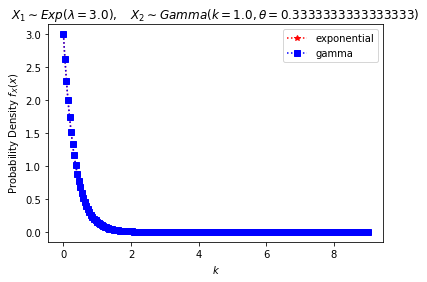

In [ ]:
import scipy.stats as stats

Rate = 3.0#@param {type:"number"}

#======== 수정 전/후 ===============
#k = 2.0
k = 1.0
#theta = 2.0
theta = 1/Rate
#====================================

Xs = np.linspace(0,Rate*3,200)

rv_X1 = stats.expon(scale=1/Rate)
rv_X2 = stats.gamma(k, scale=theta)

plt.plot(Xs, rv_X1.pdf(Xs),'r:*', label='exponential')
plt.plot(Xs, rv_X2.pdf(Xs), 'b:s', label='gamma')
plt.ylabel('Probability Density $f_X(x)$')
plt.xlabel('$k$')
plt.title('$X_1 \sim Exp(\lambda={}), \quad X_2\sim Gamma(k={},\\theta={})$'.format(Rate, k, theta))
plt.legend()
plt.show()

# T3. Gaussian and Student's T 

가우시안/정규 분포를 따르는 모집단에서 크기가 $n$인 표본을 추출하자. 표본 평균의 분포는 $\nu$로 표현되는 자유도(degree of freedom)가 $\nu = n-1$인 t 분포를 따르는 것이 알려져 있다. 가우시안/정규 분포와 *t* 분포는 얼마나 다를까?

<font color='gray'>if we take a sample of  n  observations from a normal distribution, then the t-distribution with $\nu=n−1$  degrees of freedom can be defined as the distribution of the location of the sample mean relative to the true mean, divided by the sample standard deviation. How different are these two distributions ?</font>

*   $X_1 \sim N(\mu=0, \sigma^2 = 1^2) $
*   $X_2 \sim T(\nu) $

---
<font color="blue">**답변** *t* 분포의 자유도(deegree of freedom : $\nu$)가 큰 값을 가질 수록 정규분포와 유사해진다. </font>


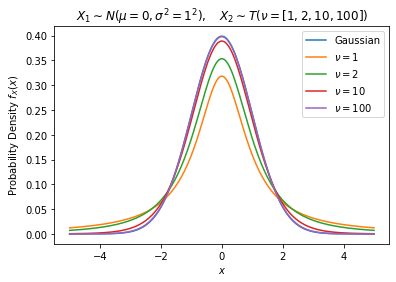

In [ ]:
Nu = [1,2,10,100] #@param {type:"raw"}
Xs = np.linspace(-5.0,5.0,200)

rv_X1 = stats.norm(0,1)
plt.plot(Xs, rv_X1.pdf(Xs), label='Gaussian')

#======== 수정 전/후 ===============
#rv_X2 = stats.t(Nu[0])
#plt.plot(Xs, rv_X2.pdf(Xs), label='$\\nu={}$'.format(Nu[0]))
for i in range(len(Nu)):
  plt.plot(Xs, stats.t.pdf(Xs,Nu[i]), label='$\\nu={}$'.format(Nu[i]))
#====================================

plt.ylabel('Probability Density $f_X(x)$')
plt.xlabel('$x$')
plt.title('$X_1 \sim N(\mu=0,\sigma^2=1^2), \quad X_2 \sim T(\\nu={})$'.format(Nu))
plt.legend()
plt.show()